Decision Trees is one of the oldest machine learning algorithm. It's extremely robutst, and it can traceback for decades. Decision Trees is the algorithm that without expensive kernel in SVM, able to solve non-linear problem with linear surface.
<!-- TEASER_END -->

For other information, please check this [link](http://napitupulu-jon.appspot.com/posts/Decision-Trees.html). This also the final of the third learning algorithm of supervised classfication at Introduction to Machine Learning at Udacity. Check the reference at the bottom of the page for more information. D

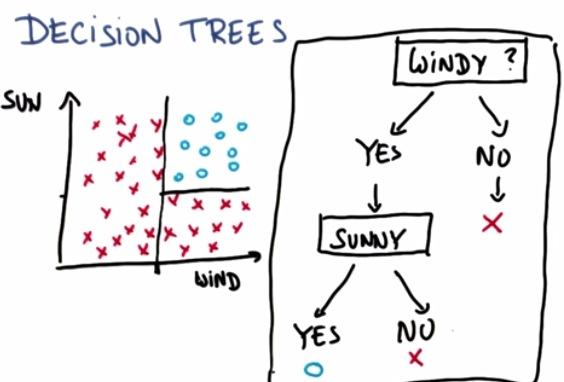

In [6]:
Image('decision-tree-ud_files/2.jpg')

In binary-classification(only two outcomes), Decision Trees count all possible output availables.

For this particular problem, we asked one feature first(e.g. windy?) and keep doing it until we reach all leaves.

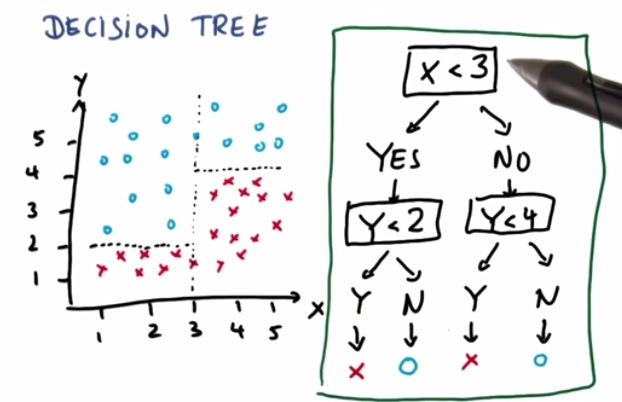

In [7]:
Image('decision-tree-ud_files/3.jpg')

This is the more complex problem for decision tree.

It still use binary classification. For this x,y feature and range from 1-5, we're still asking two options and use less than or greated than. For this example, we choose first options |x<3|. Now for the example that we have, if we choose YES |x<3| then we will create a new boundary (decision boundary) that split the region in two. After that we specify the other feature (y). and ultimately, the outcome of Y (either yes or no) would point the output that are given. For |x>3| which means No, we also ask second question with Y and will produce the outcome of either blue circle or red cross

### Decision Trees with SKLearn

In [1]:
%pylab inline
import sys
sys.path.append('../tools')

Populating the interactive namespace from numpy and matplotlib


In [2]:
%%writefile classifyDT.py

def classify(features_train, labels_train):
    from sklearn import tree
    clf = tree.DecisionTreeClassifier()
    clf.fit(features_train, labels_train)
    
    return clf

Overwriting classifyDT.py


/Users/jon/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1155: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


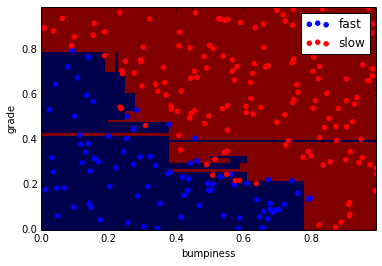

In [3]:
#!/usr/bin/python

""" lecture and example code for decision tree unit """

import sys
from class_vis import prettyPicture, output_image
from prep_terrain_data import makeTerrainData

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from classifyDT import classify

features_train, labels_train, features_test, labels_test = makeTerrainData()



### the classify() function in classifyDT is where the magic
### happens--it's your job to fill this in!
clf = classify(features_train, labels_train)

# clf = tree.DecisionTreeClassifier()
# clf.fit(features_train, labels_train)
#### grader code, do not modify below this line

prettyPicture(clf, features_test, labels_test)
# output_image("test.png", "png", open("test.png", "rb").read())


In this plot, we know that decision tree is trying to separate the region by linear separable line. Notice that decision tree is overfitting in this example

Let's see the accuracy of  the algorithm

In [6]:
clf.score(features_test,labels_test)

0.90800000000000003

The Decision Tree have almost 91% accuracy, but we can see there's overfitting in our solution. Let's see the sklearn documentation to tackle this problem.


In [8]:
from IPython.display import Image

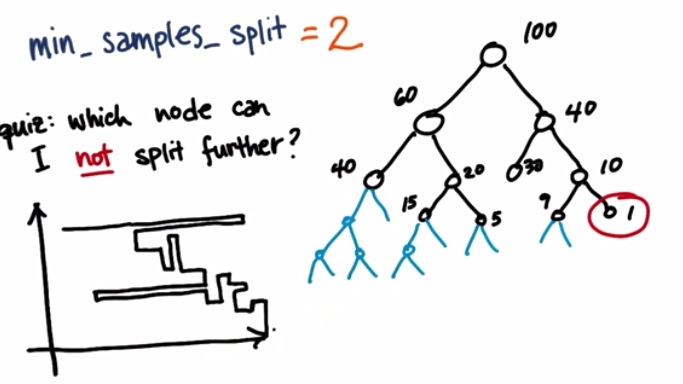

In [9]:
Image('decision-tree-ud_files/4.jpg')

min_samples_split in documentation of sklearn, specifies, that if we have 100 samples, and min split=2(default) it will keep splitting the data, if the samples, have at least two point in the region. if the leaf reach 1, the decision tree will ignore the it, so the leaf with sample count 1 will not get split.

It's important to note that, the DT will always split if there's region that have min_samples_split count in the area. So if we at least, specify that min_samples=50, it will get at least 50 samples(point) to perform splitting. Let's test this

In [10]:
from sklearn import tree

In [11]:
clf_min_samples_50 = tree.DecisionTreeClassifier(min_samples_split=50)

In [12]:
clf_min_samples_50.fit(features_train,labels_train)

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=50,
            random_state=None, splitter='best')

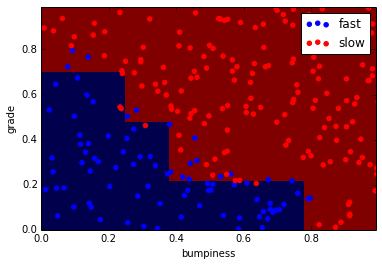

In [13]:
prettyPicture(clf_min_samples_50,features_test,labels_test)

We can see that the decision tree is less overfitting. And because it's less overfitting, means that we at least should have higher accuracy. 

Let's test this!

In [14]:
clf_min_samples_50.score(features_test,labels_test)

0.91200000000000003

And there you go, we have 91.2% accuracy compared to min_samples_2(default) which has 90.8%

### Entropy

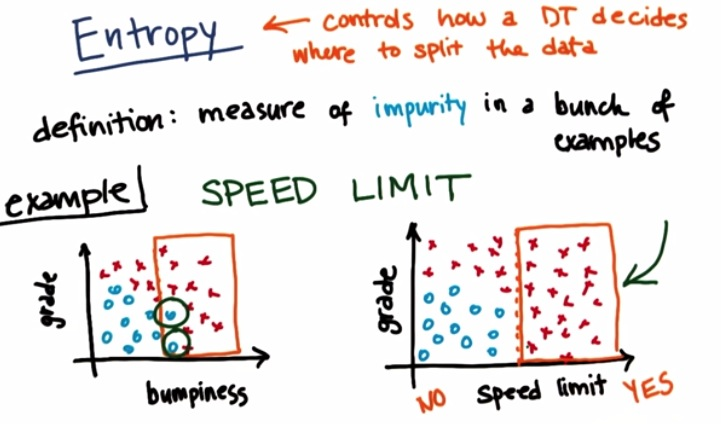

In [17]:
Image('decision-tree-ud_files/5.jpg')

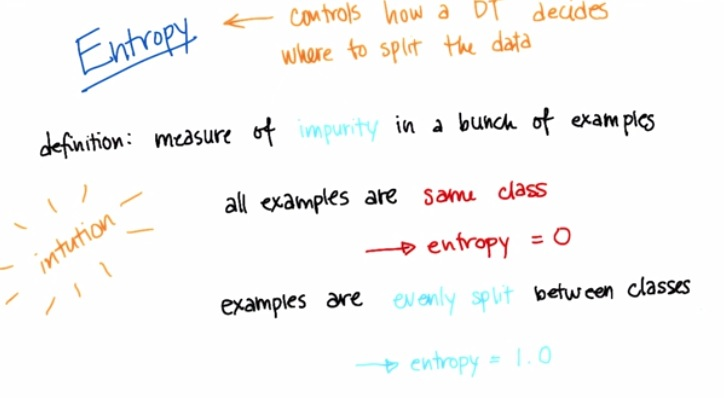

In [16]:
Image('decision-tree-ud_files/6.jpg')

Entropy is the one of Decision Tree parameter that can tell the algorithm,how it should expand the split area.
The Entropy that is perfectly split the the region into two class will have high entropy. In the other hand, if we split the region and we still get same class for both region then it's zero. The entropy is like how much information gain that we have if we split the area.

Here's some other notes from Udacity:

"Some sources use other bases for the logarithm (for example, they might use log base 10 or the natural log, with a base of approx. 2.72)--those details can change the maximal value of entropy that you can get. In our case, where there are 2 classes, the log base 2 formula that we use will have a maximal value of 1.

In practice, when you use a decision tree, you will rarely have to deal with the details of the log base--the important takeaway here is that lower entropy points toward more organized data, and that a decision tree uses that as a way how to classify events."


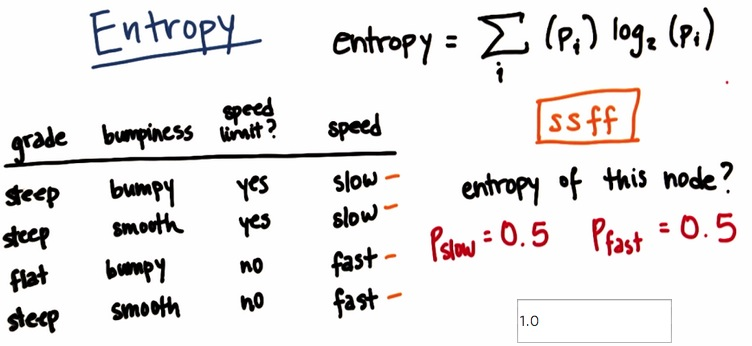

In [18]:
Image('decision-tree-ud_files/7.jpg')

Now in the top right we have some formula for calculating the entropy. The formula actually lack of minus sign in the beginnning.

First we observe one node, the speed, and the samples in the node are [ssff].If we get Pslow, of all the examples we have 0.5, and that also applies to Pfast 0.5.

Now if we are to calculate the entropy of this node, based in the intuition earlier, we should get 1.0, because we perfectly split the node into two class, slow and fast, both equal 0.5, 0.5.

Let's test this by code out of curiousity!


In [29]:
import math

Because we have same probability for both fast and slow, we assign by 1 variable

In [23]:
entropi = -(0.5)*math.log(0.5,2)

after we assign a variable, we want to calculate both of class with same probability, so we just multiply by two.

In [26]:
entropi*2

1.0

For entropy to work with Decision Tree, we take into account an Information Gain

Check out other other information about entropy [here](http://napitupulu-jon.appspot.com/posts/ID3.html)

### Information Gain

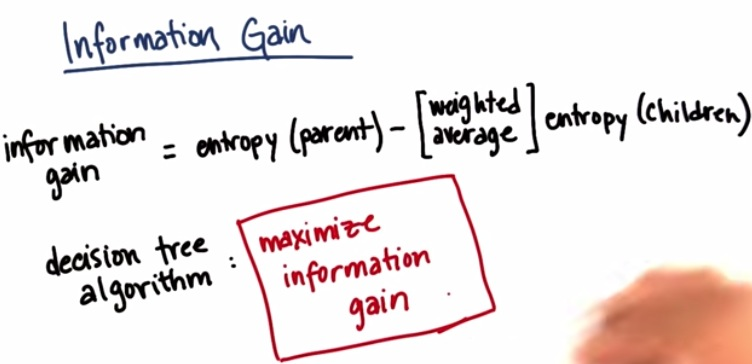

In [27]:
Image('decision-tree-ud_files/8.jpg')

The decision tree algorithm will maximize information gain. What does it mean by this, is when we select a feature, with various different value, we want some limit of that particular feature that maximize the split.In other words, to have an order  of which the features should be prioritized first to do splitting, decision tree algorithm do sorting of Information Gain value of each features from maximum to minimum.

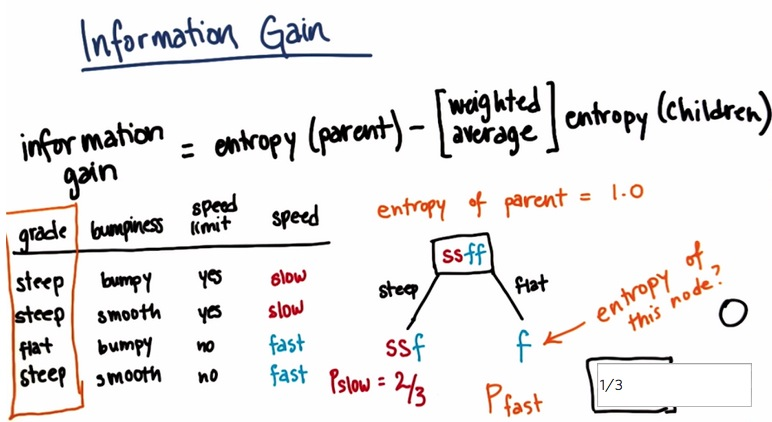

In [44]:
Image('decision-tree-ud_files/9.jpg')

Let's go back to Sebastian Thrun's examples. The output(predicting value) should be speed, either slow or fast. Then we have 3 different parameters, each have binary value.

Let's first observe grade. by plotting tree like above, either steep or flat, we separate it by the column grade specifies.
the value are st-st-fl-st. If we look at the plot flat only get f, and steep combination of slow and fast.

The entropy of node flat in this case is zero. This is because we only have fast in this node, so perform some splitting will get nothing, we only split in the same class.In the contrary, the steep has ssf, and for slow the probability is 2/3, and fast 1/3

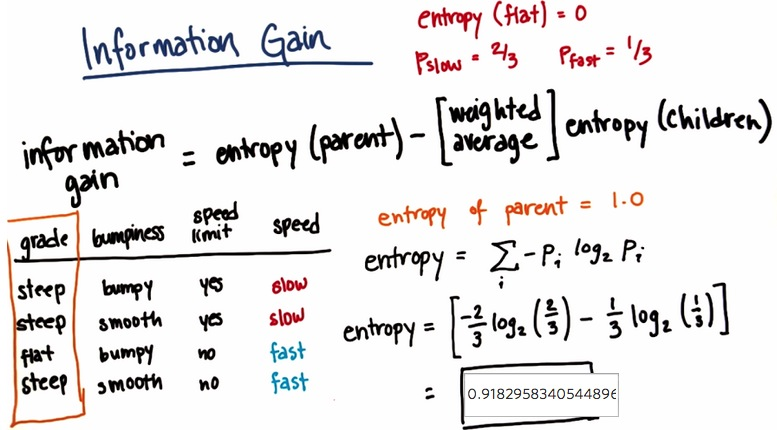

In [45]:
Image('decision-tree-ud_files/10.jpg')

After we have entropy flat, we calculate the entropy of steep, given Pslow and Pfast.
Here's we have the the formula for calculating the entropy, and the solution code as follows:

In [36]:
frac = 2.0/3

In [38]:

- frac * math.log(frac,2) - (1-frac) * math.log((1-frac),2)

0.9182958340544896

Or, we can use scipy

In [40]:
import scipy

In [42]:
scipy.stats.entropy([2,1],base=2)

0.91829583405448945

Now that we have entropy of both steep and flat, we are ready to calculate total entropy(Information Gain) of feature 'grade'

The weighted average is the probablity of which steep/flat occurs.

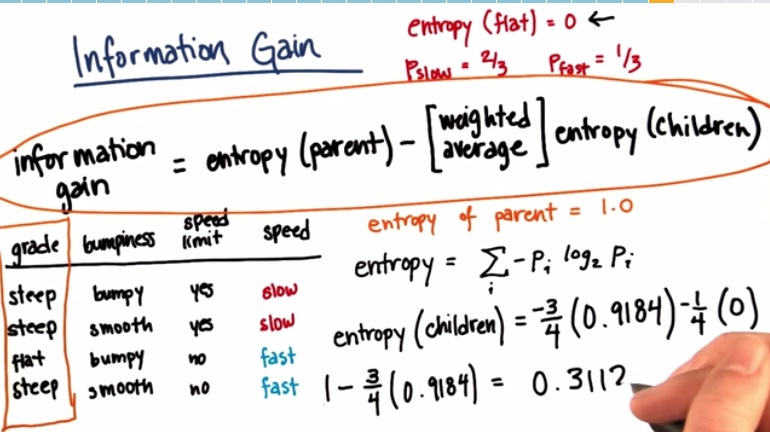

In [46]:
Image('decision-tree-ud_files/11.jpg')

In [43]:
1.0-(3.0/4 * 0.9184) 

0.31120000000000003

This is the Information Gain value for feature 'grade'.

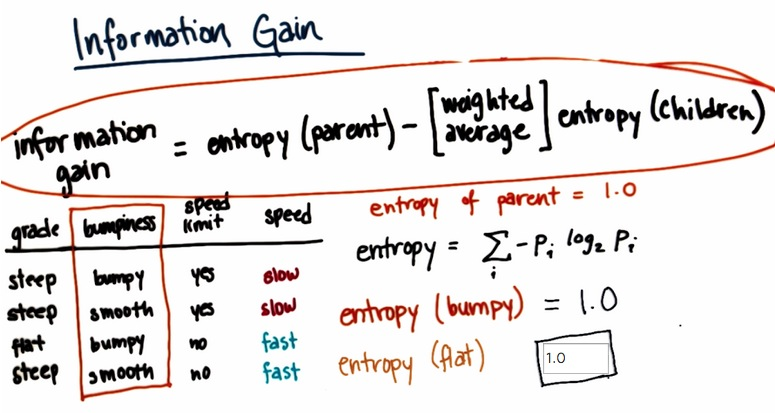

In [48]:
Image('decision-tree-ud_files/13.jpg')

Here even we split by bumpiness, either bumpy/smooth, we have still have even weight of slow/fast (each one samples).

In [49]:
2.0/4 * 1.0 - 2.0/4 * 1.0 

0.0

The Information Gain that we get is zero. This is perfectly reasonable. Because if we split it based on the bumpiness, we get nowhere. Split bumpy/smooth we still get either slow or fast, in even weighted average. This is what we called overfitting in decision tree, because we only get useless additional calculation if we include this. This feature , all features that have zero value of Information Gain, should be eliminated in the feature selection. 

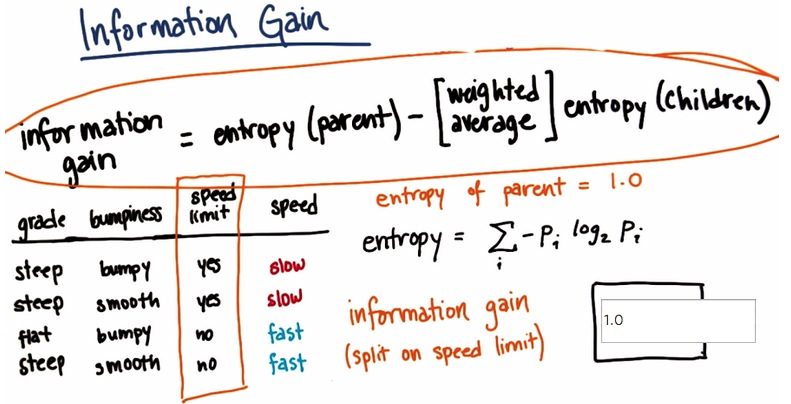

In [50]:
Image('decision-tree-ud_files/14.jpg')

In the speed limit, if we split it, we have same ff/ss in each class. Then the entropy of each branch of speed limit, is 0. This is perfect split, split purity, all slow and all fast on each side, make it 1.0 Information Gain

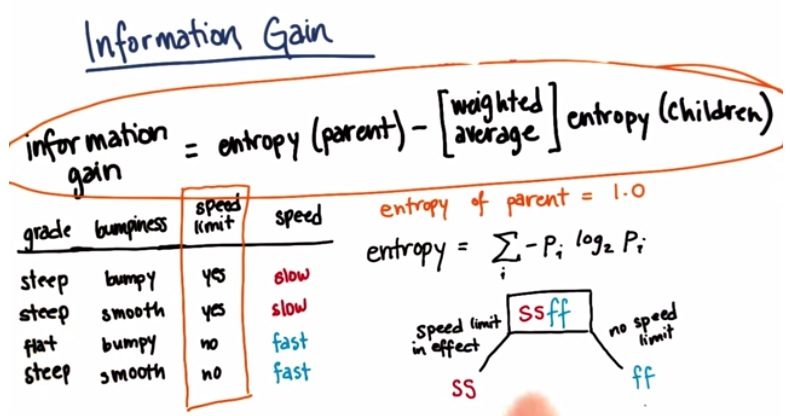

In [47]:
Image('decision-tree-ud_files/12.jpg')

In order of Information Gain from max-min for priotizing the order of split, we get speed limit(1.0), grade(0.3), bumpiness(0.0).

Notice that in the picture we only include speed limit. This happens because the feature have 1.0 Information Gain, which means perfect split, we no longer need all other features, and use only this instead. Adding other features will only get more prone to overfitting.

Of course this just based on the samples that we have. We may not get 1.0 Information Gain if we include future examples. If that's the case, we want to gather sample enough to build the predictive model.

### Bias-Variance

Bias-Variance is important tradeoff in machine learning. Too bias we get too generalize, and only get wrong result if problem varies. IN the other hand, if we too commit in the training, than for new problem we don't generalize, we don't know what to do if we handle something new. 

### Strength-Weakness

The strength of the Decision Tree compare to SVM, is because it's really fast. Linear Surface, compare to SVM polynomial situation. But the weakness is a problem has lots of parameters. If that's the case then it's prone to overfitting, and we may want to stop the growth of tree at the appropriate time

### Mini Project

We will still be using email text learning for the mini project

Using the starter code in decision_tree/dt_author_id.py, get a decision tree up and running as a classifier, setting min_samples_split=40. It will probably take a while to train. What’s the accuracy?

In [52]:
%load dt_author_id.py

In [54]:
#!/usr/bin/python

""" 
    this is the code to accompany the Lesson 3 (decision tree) mini-project

    use an DT to identify emails from the Enron corpus by their authors
    
    Sara has label 0
    Chris has label 1

"""
    
import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()

no. of Chris training emails: 7936
no. of Sara training emails: 7884


In [56]:
from sklearn import tree

In [57]:
clf_min_split_40 = tree.DecisionTreeClassifier(min_samples_split=40)

In [59]:
clf_min_split_40.fit(features_train,labels_train)

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=40,
            random_state=None, splitter='best')

In [60]:
clf_min_split_40.score(features_test,labels_test)

0.97895335608646183

You found in the SVM mini-project that the parameter tune can significantly speed up the training time of a machine learning algorithm. A general rule is that the parameters can tune the complexity of the algorithm, with more complex algorithms generally running more slowly.

Another way to control the complexity of an algorithm is via the number of features that you use in training/testing. The more features the algorithm has available, the more potential there is for a complex fit. We will explore this in detail in the “Feature Selection” lesson, but you’ll get a sneak preview now.

What's the number of features in your data? (Hint: the data is organized into a numpy array where the number of rows is the number of data points and the number of columns is the number of features; so to extract this number, use a line of code like len(features_train[0]).)

In [61]:
print len(features_train[0])

3785


go into ../tools/email_preprocess.py, and find the line of code that looks like this: 

selector = SelectPercentile(f_classif, percentile=10) 

Change percentile from 10 to 1, and rerun dt_author_id.py. What’s the number of features now?

In [63]:
%load ../tools/email_preprocess.py

In [73]:
# %%writefile ../tools/email_preprocess.py
#!/usr/bin/python

import pickle
import numpy

from sklearn import cross_validation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif



def preprocess(words_file = "../tools/word_data.pkl", authors_file="../tools/email_authors.pkl"):
    """ 
        this function takes a pre-made list of email texts (by default word_data.pkl)
        and the corresponding authors (by default email_authors.pkl) and performs
        a number of preprocessing steps:
            -- splits into training/testing sets (10% testing)
            -- vectorizes into tfidf matrix
            -- selects/keeps most helpful features

        after this, the feaures and labels are put into numpy arrays, which play nice with sklearn functions

        4 objects are returned:
            -- training/testing features
            -- training/testing labels

    """

    ### the words (features) and authors (labels), already largely preprocessed
    ### this preprocessing will be repeated in the text learning mini-project
    word_data = pickle.load( open(words_file, "r"))
    authors = pickle.load( open(authors_file, "r") )

    ### test_size is the percentage of events assigned to the test set (remainder go into training)
    features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(word_data, authors, test_size=0.1, random_state=42)



    ### text vectorization--go from strings to lists of numbers
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')
    features_train_transformed = vectorizer.fit_transform(features_train)
    features_test_transformed  = vectorizer.transform(features_test)



    ### feature selection, because text is super high dimensional and 
    ### can be really computationally chewy as a result
    selector = SelectPercentile(f_classif, percentile=1)
    selector.fit(features_train_transformed, labels_train)
    features_train_transformed = selector.transform(features_train_transformed).toarray()
    features_test_transformed  = selector.transform(features_test_transformed).toarray()

    ### info on the data
    print "no. of Chris training emails:", sum(labels_train)
    print "no. of Sara training emails:", len(labels_train)-sum(labels_train)


    return features_train_transformed, features_test_transformed, labels_train, labels_test


In [74]:
#!/usr/bin/python

""" 
    this is the code to accompany the Lesson 3 (decision tree) mini-project

    use an DT to identify emails from the Enron corpus by their authors
    
    Sara has label 0
    Chris has label 1

"""
    
import sys
from time import time
sys.path.append("../tools/")
#from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()

no. of Chris training emails: 7936
no. of Sara training emails: 7884


In [75]:
print len(features_train[0])

379


What do you think SelectPercentile is doing? Would a large value for percentile lead to a more complex or less complex decision tree, all other things being equal? Note the difference in training time depending on the number of features.

In [76]:
clf_min_split_40 = tree.DecisionTreeClassifier(min_samples_split=40)

In [78]:
clf_min_split_40.fit(features_train,labels_train)

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=40,
            random_state=None, splitter='best')

In [79]:
clf_min_split_40.score(features_test,labels_test)

0.96643913538111492

>**Reference**:

>* https://www.udacity.com/course/viewer#!/c-ud120/l-2258728540/e-2436218557/m-2385268690

>* http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html